# Tutorial of network schematas - Bio Models
The network schematas for biological relevant boolean network models

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from __future__ import division
import os
import math
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2g}'.format
import graphviz
import cana
from cana.drawing import draw_canalizing_map_graphviz
import matplotlib as mpl
import matplotlib.style
mpl.style.use('classic')
import random
mpl.rc('font', **{'size':16})
import matplotlib.pyplot as plt
from cana.datasets.bio import THALIANA, DROSOPHILA, BUDDING_YEAST
from IPython.display import display, Image, Latex, SVG, HTML
import subprocess

In [3]:
N = THALIANA()
#N = DROSOPHILA()
#N = BUDDING_YEAST()
print N

<BNetwork(Name='Arabidopsis Thaliana', N=15, Nodes=['AP3', 'UFO', 'FUL', 'FT', 'AP1', 'EMF1', 'LFY', 'AP2', 'WUS', 'AG', 'LUG', 'CLF', 'TFL1', 'PI', 'SEP'])>


## Effective Graph

In [4]:
Nsg = N.structural_graph()

In [5]:
# Node Position for each one of the models
nodes = {d['label']:i for i,d in Nsg.nodes(data=True)}
print nodes
att = {}
#
if N.name == 'Arabidopsis Thaliana':
    foldername = 'thaliana'
    
    # Calculates Node position in a circle. Used to plot nodes always in the same position.
    for deg,name in zip(range(0,360,30), ['AG', 'AP3', 'PI', 'AP2', 'TFL1', 'FUL', 'AP1', 'FT', 'EMF1', 'LFY', 'SEP', 'WUS']):
        r = 150
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['UFO','LUG','CLF'], [(200.,140.),(240.,50.),(240.,-50.)]):
        att[name] = {'x':x,'y':y}

elif N.name == 'Drosophila Melanogaster':
    foldername = 'drosophila'
    
    x,y = np.linspace(0,500,8,dtype=int), np.linspace(500,0,8,dtype=int)
    att['nWG']    = {'x':x[5],'y':y[0],'fillcolor':'#4f6fb0'}
    att['SLP']    = {'x':x[7],'y':y[1],'fillcolor':'#4f6fb0'}
    att['en']     = {'x':x[5],'y':y[1]}
    att['EN']     = {'x':x[5],'y':y[2]}
    att['nhhnHH'] = {'x':x[1],'y':y[4]}
    att['ci']     = {'x':x[4],'y':y[3]}
    att['PTC']    = {'x':x[2],'y':y[4]}
    att['nhhnHH'] = {'x':x[2],'y':y[2],'fillcolor':'#4f6fb0'}
    att['CI']     = {'x':x[4],'y':y[4]}
    att['PH']     = {'x':x[0],'y':y[5]}
    att['SMO']    = {'x':x[1],'y':y[5]}
    att['CIA']    = {'x':x[3],'y':y[5]}
    att['CIR']    = {'x':x[4],'y':y[5]}
    att['ptc']    = {'x':x[3],'y':y[6]}
    att['wg']     = {'x':x[4],'y':y[6]}
    att['hh']     = {'x':x[6],'y':y[6]}
    att['WG']     = {'x':x[4],'y':y[7]}
    att['HH']     = {'x':x[6],'y':y[7]}

elif N.name == 'Budding Yeast Cell Cycle':
    foldername = 'yeast'
    
    # Calculates Node position in a circle.
    for deg,name in zip( np.linspace(0,360,10), ['Cln3','MBF','Clb5,6','Mcm1/SFF','Swi5','Cdc20/14','Cdh1','Cln1,2','SBF']):
        r = 190
        deg += 90
        x, y = r*math.cos(math.radians(deg)), r*math.sin(math.radians(deg))
        att[name] = {'x':x,'y':y}
    # Nodes not on the circle. Manually position them = UFO, LUG, CLF
    for name,(x,y) in zip(['CellSize','Sic1','Clb1,2'], [(0.,280.),(0.,100.),(0.,-50.)]):
        att[name] = {'x':x,'y':y}

{'WUS': 8, 'FT': 3, 'AG': 9, 'UFO': 1, 'AP2': 7, 'AP3': 0, 'CLF': 11, 'AP1': 4, 'SEP': 14, 'TFL1': 12, 'EMF1': 5, 'LUG': 10, 'FUL': 2, 'PI': 13, 'LFY': 6}


Nodes: 15 | Edges: 44


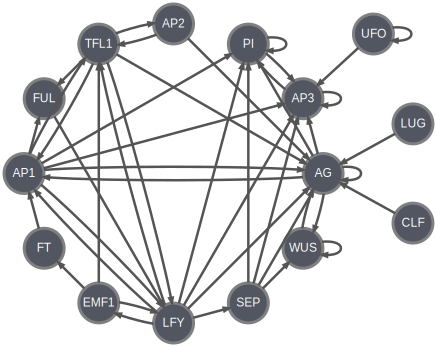

In [6]:
# Draw the Structural Graph
S = graphviz.Digraph(name='Structural Graph', engine='neato')
S.attr('graph', concentrate='false', simplify='false', overlap='false',splines='false')
S.attr('node', pin='true', shape='circle', fixedsize='true', width='.55', color='gray', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
S.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Nsg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        if 'x' in natt or 'y' in natt:
            x,y = natt['x'] , natt['y']
            xy = '%.2f,%.2f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = ''
        fillcolor = '#515660'
    S.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Nsg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    S.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled, )
print 'Nodes: %d | Edges: %d' % (len(Nsg.nodes()) , len(Nsg.edges()) )
# Display
display(SVG(S.pipe(format='svg')),metadata={'isolated':True})
# Export
#S._format = 'svg'
#efile = u"%s/../experiments/2017 - BioModels/%s/graphs/SG" % (os.getcwd(),foldername)
#S.render(efile, cleanup=True)
#subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)

In [7]:
# Calculate Effective Graph
threshold = 0.00
Neg = N.effective_graph(mode='input',bound='upper', threshold=threshold)

Nodes: 15 | Edges: 41


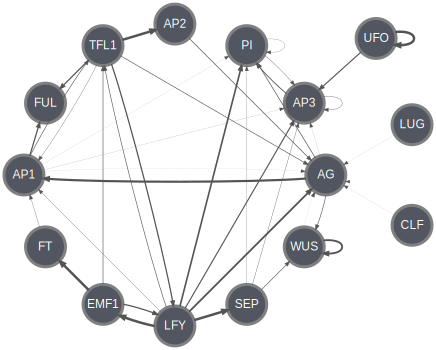

0

In [8]:
# Draw the Effective Graph
E = graphviz.Digraph(name='Effective Graph', engine='neato')
E.attr('graph', concentrate='false', simplify='false')
E.attr('node', shape='circle', fixedsize='true', width='.55', color='grey', style='filled', fillcolor='#515660', penwidth='3', fontname='Helvetica', fontcolor='white',fontsize='12')
E.attr('edge', arrowhead='normal', arrowsize='.5', color='#545454')

for node,d in Neg.nodes(data=True):
    if d['label'] in att:
        natt = att[d['label']]
        x,y = natt['x'],natt['y']
        xy = '%.1f,%.1f!' % (x/72,y/72)
        if 'fillcolor' in natt:
            fillcolor = natt['fillcolor']
        else:
            fillcolor = '#515660'
    else:
        xy = 'false'
    E.node(name=str(node), label=d['label'], pos=xy, fillcolor=fillcolor)

max_penwidth = 2.5
for s,t,d in Neg.edges(data=True):
    weight = '%d' % (d['weight']*100)
    penwidth_scaled = '%.2f' % ( (d['weight']/1)*max_penwidth )
    E.edge(str(s),str(t), weight=weight, penwidth=penwidth_scaled)
    
print 'Nodes: %d | Edges: %d' % (len(Neg.nodes()) , len(Neg.edges()) )
## Display
display(SVG(E.pipe(format='svg')),metadata={'isolated':True})
## Export
E._format = 'svg'
efile = u'%s/../experiments/2017 - BioModels/%s/graphs/EG' % (os.getcwd(),foldername)
E.render(efile, cleanup=True)
subprocess.call("inkscape -z '%s.svg' -d 300 -e '%s.png'" % (efile,efile) , shell=True)

In [9]:
bound = 'upper'
print N.nodes[1].schemata_look_up_table(type="ts")
df = pd.DataFrame({
        'node':[n.name for n in N.nodes],
        'k':[n.k for n in N.nodes],
        'k_r':[n.input_redundancy(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_e':[n.effective_connectivity(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_s':[n.input_symmetry(mode='node',bound=bound,norm=False) for n in N.nodes],
        'k_r*':[n.input_redundancy(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_e*':[n.effective_connectivity(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k_s*':[n.input_symmetry(mode='node',bound=bound,norm=True) for n in N.nodes],
        'k^{out}':[v for n,v in Neg.out_degree()],
        'k_e^{out}':[v for n,v in Neg.out_degree(weight='weight')],
    }).set_index('node')
df = df[['k','k_r','k_e','k_s','k_r*','k_e*','k_s*','k^{out}','k_e^{out}']]
print df

  In:  Out:
0   0     0
1   1     1
      k  k_r  k_e  k_s  k_r*  k_e*  k_s*  k^{out}  k_e^{out}
node                                                        
AP3   7  4.8  2.2  3.5  0.69  0.31  0.51        2       0.48
UFO   1    0    1    0     0     1     0        2        1.5
FUL   2 0.75  1.2    2  0.38  0.62     1        0          0
FT    1    0    1    0     0     1     0        1       0.12
AP1   4  2.4  1.6  1.9  0.61  0.39  0.47        5       0.85
EMF1  1    0    1    0     0     1     0        3        1.8
LFY   4  2.8  1.2    2  0.69  0.31   0.5        7        4.2
AP2   1    0    1    0     0     1     0        1       0.27
WUS   3  1.5  1.5  1.3   0.5   0.5  0.44        2       0.77
AG    9  6.9  2.1  3.4  0.77  0.23  0.38        5        1.5
LUG   0    0    1    0     0     1     0        1      0.023
CLF   0    0    1    0     0     1     0        1      0.023
TFL1  4  2.8  1.2    2  0.69  0.31   0.5        5        2.4
PI    6  3.9  2.1  2.5  0.65  0.35  0.42        2

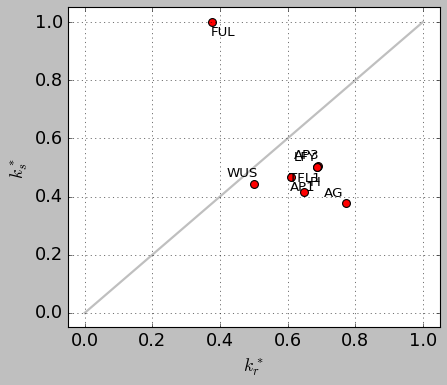

In [10]:
fig, ax = plt.subplots(1,1,figsize=(6,5), sharex=True, sharey=True)
dfp = df.loc[ (df['k']>1) , :]
ax.scatter(dfp['k_r*'],dfp['k_s*'], s=50, c='red', marker='o', zorder=2)
quadrants = [-0.035,0.035]
for name, dfp_ in dfp.iterrows():
    x,y = dfp_['k_r*']+random.choice(quadrants) , dfp_['k_s*']+random.choice(quadrants)
    ax.annotate(name, (x,y),fontsize=12, va='center', ha='center')
ax.plot((0,1),(0,1),'black', lw=2,alpha=0.25, zorder=1)
ax.grid(True)
ax.set_xlim(-0.05,1.05)
ax.set_ylim(-0.05,1.05)
ax.set_xlabel('$k_r^*$')
ax.set_ylabel('$k_s^*$')
## Display
print
## Export
#plt.savefig('../experiments/2017 - BioModels/%s/plots/k_sn_vs_k_rn.png' % (foldername), dpi=150)


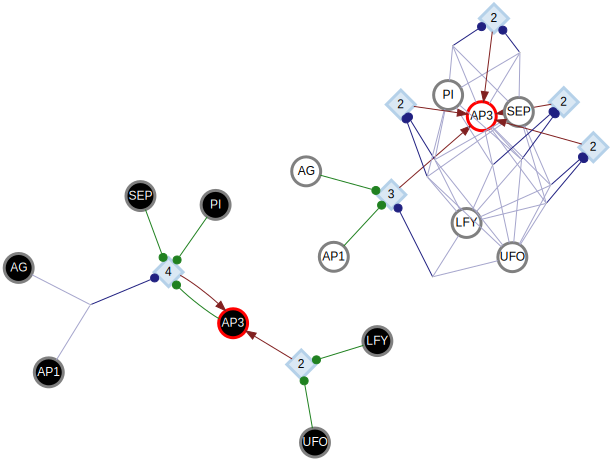

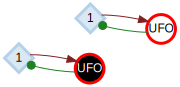

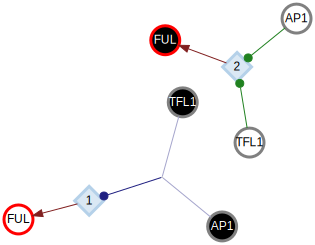

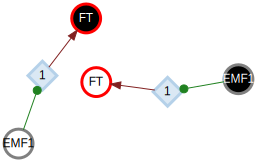

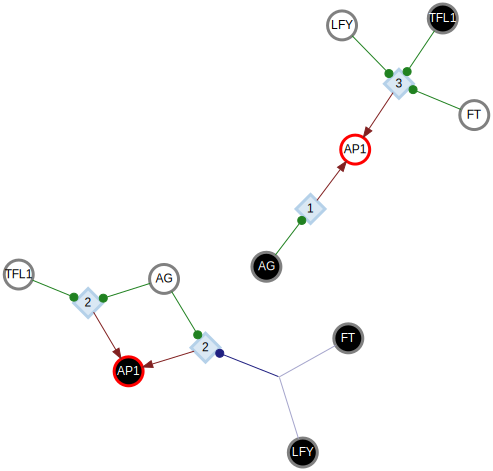

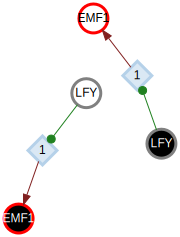

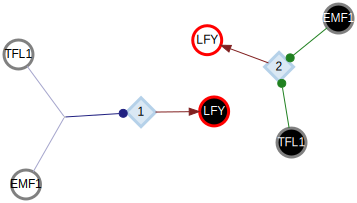

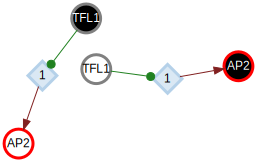

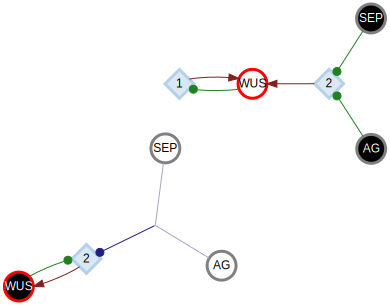

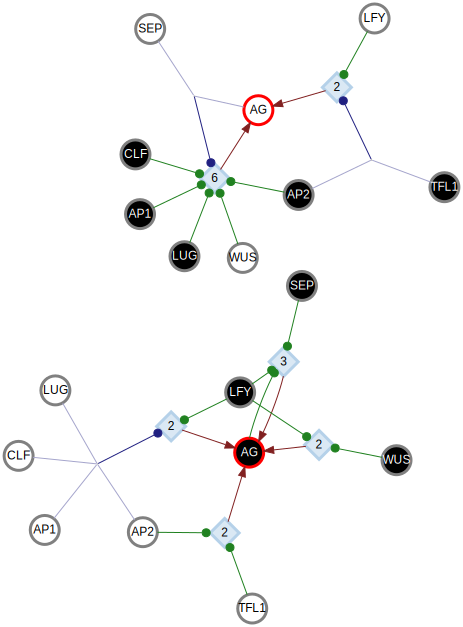

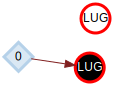

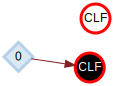

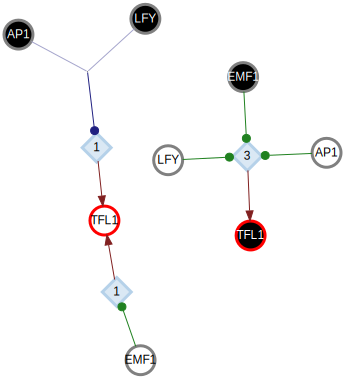

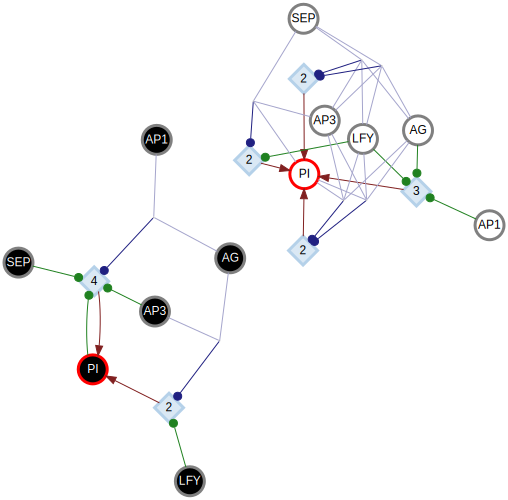

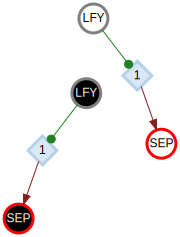

In [11]:
bound = 'upper'
for i,n in enumerate(N.nodes):
    display(HTML('<h2>'+n.name+'</h2>'))

    # to make sure each SVG renders independently, add the "metadata={'isolated':True}
    CM = n.canalizing_map()
    gv = draw_canalizing_map_graphviz(CM)

    ## Display
    display(SVG(gv.pipe(format='svg')), metadata={'isolated':True})

    ## Export to .SVG
    filename = n.name
    filename = filename.replace(',','_')
    filename = filename.replace('/','_')
    gv._format = 'svg'
    efile = u'%s/../experiments/2017 - BioModels/%s/CM/%s-%s' % (os.getcwd(),foldername,i,filename)
    #gv.render(efile, cleanup=True)
    #subprocess.call("inkscape -z -d 150 '%s.svg' -e '%s.png'" % (efile,efile) , shell=True)